<a href="https://colab.research.google.com/github/tikhomirno/ML2020/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_09_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Домашнее задание (в группах)
Список участников по группам ниже.
Нужно сделать прогноз оттока клиентов (Churn), в зависимости от параметров.
От вас нужна:
  - схема анализа (используйте доски draw.io). Опишите там полностью всю схему
  - модель
  - содержательный вывод

In [2]:
import numpy as np
import warnings
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

In [3]:
student_list = ['Tonya','Masha', 'Artem', 'Sofia G', 'Tatiyana', 'Sofia K','Yulia',
                'Nastya', 'Taisia','Pavel','Varya']
np.random.seed(17)
first_team = set(np.random.choice(student_list, len(student_list)//2, replace = False))
second_team = set(student_list)-(first_team)
print(first_team, '\n', second_team)

{'Sofia G', 'Tatiyana', 'Nastya', 'Artem', 'Taisia'} 
 {'Varya', 'Pavel', 'Yulia', 'Sofia K', 'Tonya', 'Masha'}


In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.723372,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,1.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [6]:
df.Churn.describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


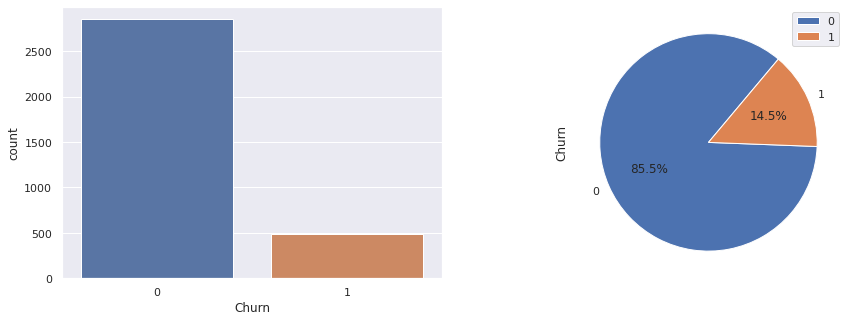

In [7]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['Churn'], ax = axs[0])
pie_churn = pd.DataFrame(df['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
plt.gca().set_aspect('equal')

plt.show()

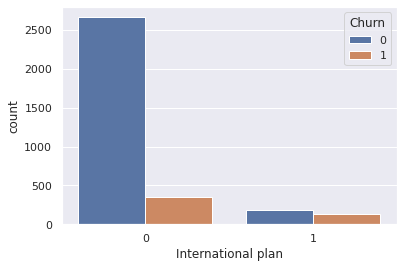

In [8]:
sns.countplot(x='International plan', hue='Churn', data=df);

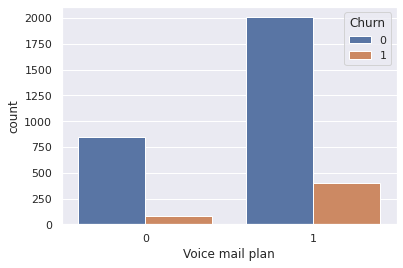

In [9]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df);

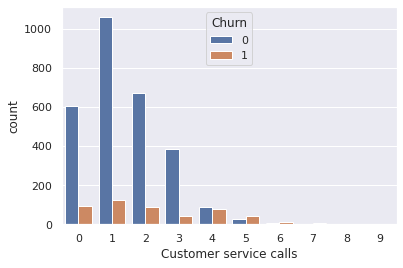

In [10]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

In [11]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

14.491449144914492

In [12]:
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X = df
X.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

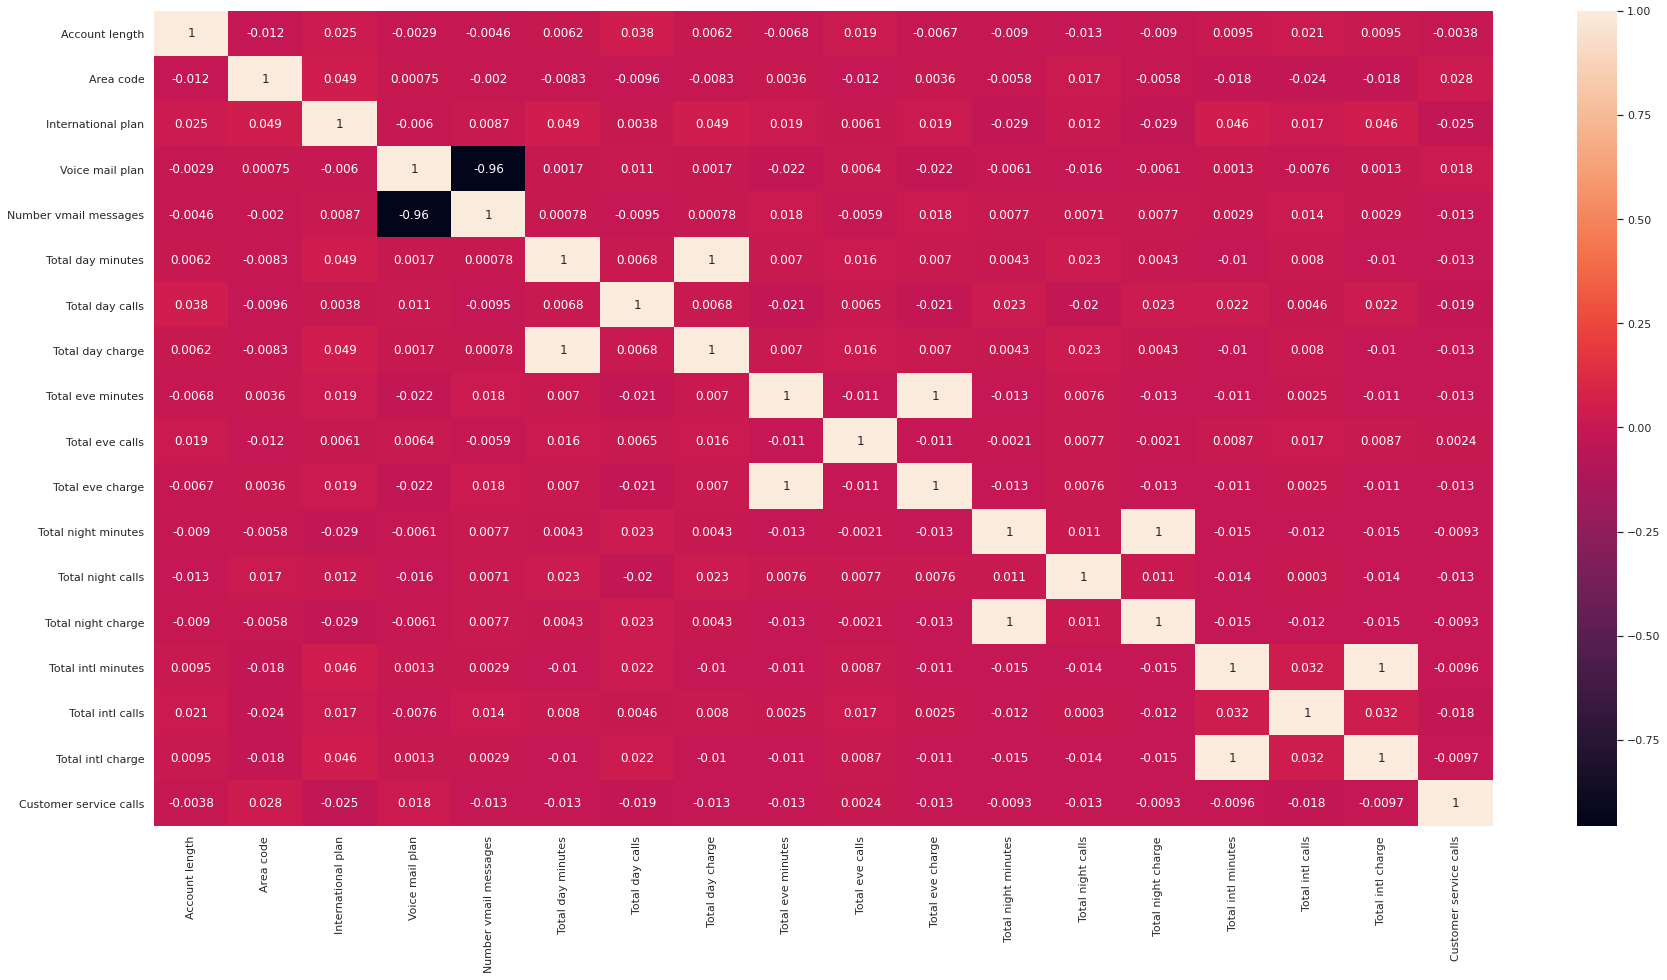

In [16]:
plt.figure(figsize = (30,15))     
sns.heatmap(df.corr(),annot = True)
plt.show()

In [17]:
X_test = X_test.drop(['Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge',], 1)
X_train = X_train.drop(['Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge',], 1)

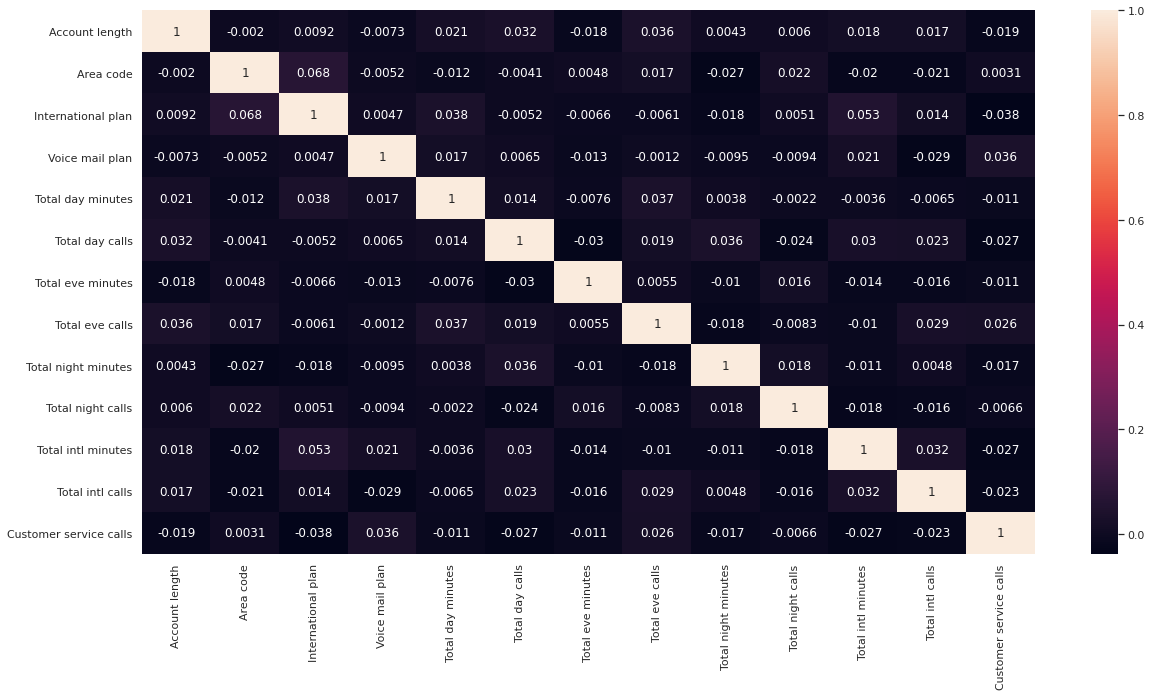

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [19]:
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                            GLM   Df Residuals:                     2319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -790.99
Date:                Sun, 08 Nov 2020   Deviance:                       1582.0
Time:                        06:36:53   Pearson chi2:                 2.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.2833      1.097     -8.464      0.000     -11.433      -7.134
Account length             0.0009      0.002      0.562      0.574      -0.002       0.004
Area code                 -0.0009      0.002     -0.560      0.575      -0.004       0.002
International plan         2.0621      0.172     11.957      0.000       1.724       2.400
Voice mail plan            0.8508      0.170      4.995      0.000       0.517       1.185
Total day minutes          0.0133      0.001     10.502      0.000       0.011       0.016
Total day calls            0.0037      0.003      1.160      0.246      -0.003       0.010
Total eve minutes          0.0063      0.001      4.693      0.000       0.004       0.009
Total eve calls            0.0022      0.003      0.695      0.487      -0.004       0.009
Total night minutes        0.0041      0.001      3.165      0.002       0.002       0.007
Total night calls          0.0010      0.003      0.303      0.762      -0.005       0.007
Total intl minutes         0.0802      0.023      3.430      0.001       0.034       0.126
Total intl calls          -0.0691      0.029     -2.420      0.016      -0.125      -0.013
Customer service calls     0.5347      0.046     11.499      0.000       0.444       0.626
==========================================================================================
"""

In [21]:
import statsmodels.api as sm

In [22]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                            GLM   Df Residuals:                     2319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -790.99
Date:                Sun, 08 Nov 2020   Deviance:                       1582.0
Time:                        06:36:53   Pearson chi2:                 2.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.2833      1.097     -8.464      0.000     -11.433      -7.134
Account length             0.0009      0.002      0.562      0.574      -0.002       0.004
Area code                 -0.0009      0.002     -0.560      0.575      -0.004       0.002
International plan         2.0621      0.172     11.957      0.000       1.724       2.400
Voice mail plan            0.8508      0.170      4.995      0.000       0.517       1.185
Total day minutes          0.0133      0.001     10.502      0.000       0.011       0.016
Total day calls            0.0037      0.003      1.160      0.246      -0.003       0.010
Total eve minutes          0.0063      0.001      4.693      0.000       0.004       0.009
Total eve calls            0.0022      0.003      0.695      0.487      -0.004       0.009
Total night minutes        0.0041      0.001      3.165      0.002       0.002       0.007
Total night calls          0.0010      0.003      0.303      0.762      -0.005       0.007
Total intl minutes         0.0802      0.023      3.430      0.001       0.034       0.126
Total intl calls          -0.0691      0.029     -2.420      0.016      -0.125      -0.013
Customer service calls     0.5347      0.046     11.499      0.000       0.444       0.626
==========================================================================================
"""

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [25]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Account length', True, 1),
 ('Area code', True, 1),
 ('International plan', True, 1),
 ('Voice mail plan', True, 1),
 ('Total day minutes', True, 1),
 ('Total day calls', True, 1),
 ('Total eve minutes', True, 1),
 ('Total eve calls', True, 1),
 ('Total night minutes', True, 1),
 ('Total night calls', True, 1),
 ('Total intl minutes', True, 1),
 ('Total intl calls', True, 1),
 ('Customer service calls', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                            GLM   Df Residuals:                     2319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -790.99
Date:                Sun, 08 Nov 2020   Deviance:                       1582.0
Time:                        06:36:54   Pearson chi2:                 2.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.2833      1.097     -8.464      0.000     -11.433      -7.134
Account length             0.0009      0.002      0.562      0.574      -0.002       0.004
Area code                 -0.0009      0.002     -0.560      0.575      -0.004       0.002
International plan         2.0621      0.172     11.957      0.000       1.724       2.400
Voice mail plan            0.8508      0.170      4.995      0.000       0.517       1.185
Total day minutes          0.0133      0.001     10.502      0.000       0.011       0.016
Total day calls            0.0037      0.003      1.160      0.246      -0.003       0.010
Total eve minutes          0.0063      0.001      4.693      0.000       0.004       0.009
Total eve calls            0.0022      0.003      0.695      0.487      -0.004       0.009
Total night minutes        0.0041      0.001      3.165      0.002       0.002       0.007
Total night calls          0.0010      0.003      0.303      0.762      -0.005       0.007
Total intl minutes         0.0802      0.023      3.430      0.001       0.034       0.126
Total intl calls          -0.0691      0.029     -2.420      0.016      -0.125      -0.013
Customer service calls     0.5347      0.046     11.499      0.000       0.444       0.626
==========================================================================================
"""

In [27]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


881     0.082842
191     0.051650
1759    0.027598
1717    0.070349
376     0.062421
3145    0.187874
2704    0.070160
440     0.116190
580     0.309586
75      0.046457
dtype: float64

In [28]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0828416 , 0.05164964, 0.0275981 , 0.07034899, 0.06242091,
       0.18787408, 0.07015998, 0.11618961, 0.30958604, 0.04645662])

In [29]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Churn,Churn_Prob,predicted
0,0,0.082842,0
1,0,0.051650,0
2,0,0.027598,0
3,0,0.070349,0
4,0,0.062421,0
5,0,0.187874,0
6,0,0.070160,0
7,0,0.116190,0
8,1,0.309586,0
9,0,0.046457,0


In [30]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[1907   65]
 [ 283   78]]


In [31]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8508358336905272


In [32]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [35]:
TN / float(TN+FP) #TRUE NEGATIVE RATE

0.9670385395537525

In [36]:
print(FP/ float(TN+FP)) #false postive rate

0.03296146044624747


In [37]:
print (TN / float(TN+ FN))  # Negative predictive 

0.8707762557077625


Avoids FN!!!!

In [38]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [39]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

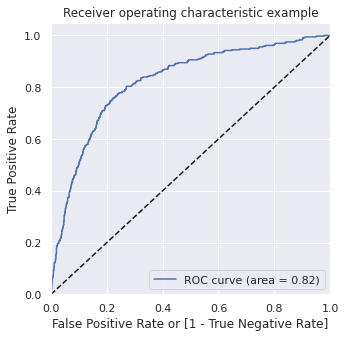

In [40]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Precision and Recall¶


In [41]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[1907,   65],
       [ 283,   78]])

In [34]:
print (TP / float(TP+FP)) # PRESICION

0.5454545454545454


In [33]:
TP / float(TP+FN) #RECALL

0.21606648199445982

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2328    0
 2329    0
 2330    0
 2331    0
 2332    0
 Name: Churn, Length: 2333, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2328    0
 2329    0
 2330    0
 2331    0
 2332    0
 Name: predicted, Length: 2333, dtype: int64)

In [48]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)


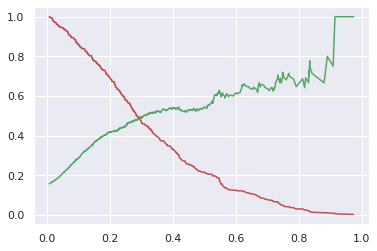

In [49]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [50]:
X_test = X_test[col]
X_test.head()

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
1997,93,415,0,1,266.0,120,130.1,84,165.8,63,13.1,6,3
1736,115,415,0,1,286.4,125,205.7,74,191.4,141,6.9,6,1
962,107,415,0,1,212.1,95,150.1,88,219.8,111,7.7,2,3
263,78,510,0,1,168.3,110,221.2,73,241.0,136,12.5,1,1
1436,83,510,0,0,226.4,117,234.7,97,133.6,82,10.8,7,1


In [51]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [61]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [58]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Churn,Churn_Prob,final_predicted
1997,0,0.323362,0
1736,1,0.204022,0
962,0,0.216434,0
263,0,0.117818,0
1436,0,0.048748,0
...,...,...,...
2157,0,0.126811,0
2325,1,0.422753,1
1043,0,0.121316,0
672,0,0.029897,0


In [59]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)


0.877

In [60]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[836,  42],
       [ 81,  41]])

In [42]:
#sns.pairplot(df)